In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:

data = pd.read_csv('archive (66).zip')  # Replace with your dataset path

In [28]:
# Display the first few rows and the column names of the dataset
print(data.head())
print(data.columns.tolist())  

                Task Description Category        Skill
0  Implement user authentication  backend  spring boot
1    Optimize server performance  backend      asp.net
2     Manage database operations  backend       django
3  Implement user authentication  backend          api
4           Build a microservice  backend       kotlin
['Task Description', 'Category', 'Skill']


In [29]:
# Specify the correct column names based on your dataset
task_description_col = 'your_task_description_column'  # Replace with the actual column name
task_category_col = 'your_task_category_column'  # Replace with the actual column name

In [30]:
# Specify the correct column names based on your dataset
task_description_col = 'Task Description'  # Correct column name for task descriptions
task_category_col = 'Category'  # Correct column name for task categories

In [31]:
# Check if the expected columns exist
if task_description_col not in data.columns or task_category_col not in data.columns:
    raise ValueError(f"The dataset must contain '{task_description_col}' and '{task_category_col}' columns.")

In [32]:
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # You can add more preprocessing steps here (e.g., removing punctuation, stemming)
    return text

In [33]:
data['processed_text'] = data[task_description_col].apply(preprocess_text)

In [34]:
# Feature Extraction
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['processed_text'])
y = data[task_category_col]  # Use the correct target variable

In [35]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Model Training
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [37]:
# Model Evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9870807453416149
Classification Report:
                          precision    recall  f1-score   support

                  ai/ml       1.00      0.82      0.90        33
                backend       1.00      0.91      0.95       479
                  cloud       1.00      1.00      1.00       315
           data science       0.99      1.00      0.99       211
               database       0.00      0.00      0.00         2
database administration       0.88      1.00      0.93       315
             deployment       1.00      1.00      1.00       318
                 devops       1.00      1.00      1.00       510
          documentation       1.00      1.00      1.00       298
               frontend       1.00      1.00      1.00       295
     project management       1.00      1.00      1.00       529
                testing       1.00      1.00      1.00       517
           ui/ux design       0.99      1.00      0.99       203

               accuracy            

C:\Users\Pranjal\Downloads\Telegram Desktop\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Pranjal\Downloads\Telegram Desktop\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Pranjal\Downloads\Telegram Desktop\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

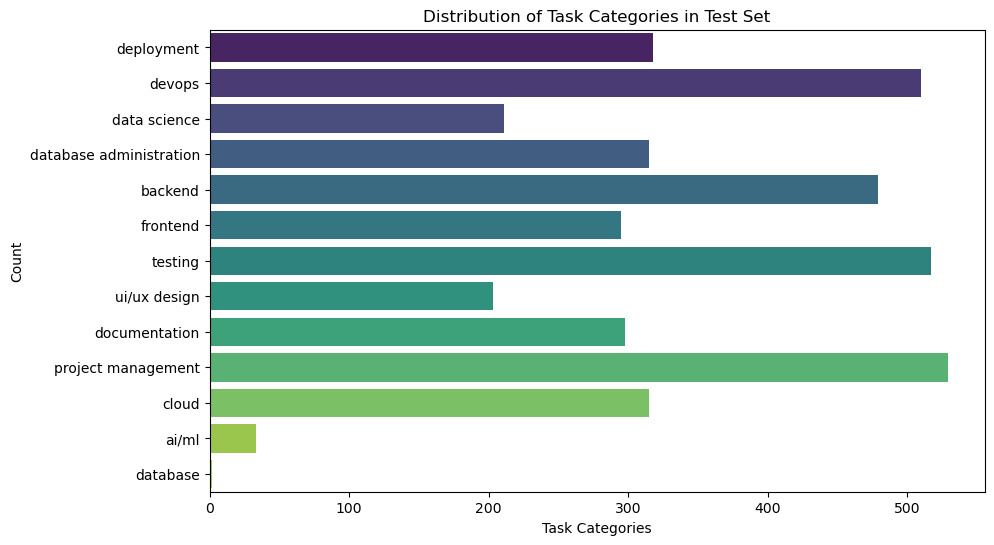

In [25]:
# Visualizing the results
plt.figure(figsize=(10, 6))
sns.countplot(y=y_test, palette='viridis')
plt.title('Distribution of Task Categories in Test Set')
plt.xlabel('Task Categories')
plt.ylabel('Count')
plt.show()